In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.special
import glob

pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',100)

In [2]:
# get the colors and genus in descending order as previously defined in script: M2_DefineColors
goodColors = np.load('/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/M2_colors_ColorsRGB.npy')
goodColorsHEX = np.load('/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/M2_colors_ColorsHEX.npy')
genus_descending = np.load('/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/M2_colors_genusDescending.npy')

In [3]:
# read in data to panda

InPath="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/2_Metagenomics/1_taxonomy/"
file_motu="motus_Merge_genus_032024_0.01minFrac_FromPY"
file_kra="KraBracken_DBstandard_042024_0.01minFrac_genus_FromPY"

df_motu=pd.read_csv(InPath+file_motu+".csv",delimiter=",",index_col=['institution','treatment','week','replicate'])
df_kra=pd.read_csv(InPath+file_kra+".csv",delimiter=",",index_col=['institution','treatment','week','replicate'])

threshold = 0.01

df_kra

name_short  Achromobacter  \
institution treatment week replicate                                   
Gent        bb        1    1              Gent_bb_1_1        0.00006   
                           2              Gent_bb_1_2        0.00007   
                           3              Gent_bb_1_3        0.00006   
                           4              Gent_bb_1_4        0.00007   
                      15   1             Gent_bb_15_1        0.00016   
                           2             Gent_bb_15_2        0.00273   
                           3             Gent_bb_15_3        0.00005   
                           4             Gent_bb_15_4        0.00007   
                           5             Gent_bb_15_5        0.00001   
            iso       15   1            Gent_iso_15_1        0.00006   
                           2            Gent_iso_15_2        0.00017   
                           3            Gent_iso_15_3        0.00007   
                           4            Gent_iso_15_4        0.00024   
NIOO        A00       1    1             NIOO_A00_1_1        0.00005   
                           2             NIOO_A00_1_2        0.00006   
                           3             NIOO_A00_1_3        0.00006   
                           4             NIOO_A00_1_4        0.00008   
                           5             NIOO_A00_1_5        0.00007   
                      15   1            NIOO_A00_15_1        0.00005   
                           2            NIOO_A00_15_2        0.00008   
                           3            NIOO_A00_15_3        0.00008   
                           4            NIOO_A00_15_4        0.00008   
                           5            NIOO_A00_15_5        0.00007   
            M00       1    1             NIOO_M00_1_1        0.00008   
                           3             NIOO_M00_1_3        0.00008   
                           4             NIOO_M00_1_4        0.00009   
                           5             NIOO_M00_1_5        0.00008   
                      15   1            NIOO_M00_15_1        0.00009   
                           3            NIOO_M00_15_3        0.00007   
                           4            NIOO_M00_15_4        0.00008   
                           5            NIOO_M00_15_5        0.00008   
            bb        1    1              NIOO_bb_1_1        0.00004   
                           3              NIOO_bb_1_3        0.00007   
                           4              NIOO_bb_1_4        0.00004   
                      15   1             NIOO_bb_15_1        0.00008   
                           3             NIOO_bb_15_3        0.00008   
                           4             NIOO_bb_15_4        0.00008   
RUG         bb        1    1               RUG_bb_1_1        0.00006   
                           2               RUG_bb_1_2        0.00008   
                           4               RUG_bb_1_4        0.00006   
                           5               RUG_bb_1_5        0.00006   
                      15   1              RUG_bb_15_1        0.00005   
                           2              RUG_bb_15_2        0.00005   
                           3              RUG_bb_15_3        0.00005   
                           4              RUG_bb_15_4        0.00006   
                           5              RUG_bb_15_5        0.00005   
UVA         anc       0    1              UVA_anc_0_1        0.00008   
                           2              UVA_anc_0_2        0.00039   
                           3              UVA_anc_0_3        0.00003   
            bb        0    1               UVA_bb_0_1        0.00033   
VU          bb        0    1                VU_bb_0_1        0.00003   
                           2                VU_bb_0_2        0.00034   
                           3                VU_bb_0_3        0.00004   
                           4                VU_bb_0_4        0.00004   
           

In [4]:
# FOR MOTU
## Sort the df according to the list genus_descending AND
## -- make sure that the colors for the species that don't exist are deleted:
species_motu = list(df_motu.columns)

species_motu_idx = []
for i in range(len(genus_descending)):
    if genus_descending[i] in species_motu:
        species_motu_idx.append(i)

# get the names and the values and then sort both
#df_woName
motu_species_order = genus_descending[species_motu_idx]
df_motu_sort = df_motu[['name_short'] + list(motu_species_order)]
finalColors_motu = goodColorsHEX[species_motu_idx]

df_motu.columns

Index(['name_short', 'Roseomonas', 'Bacillus', 'Massilia', 'Rhodococcus',
       'Streptomyces', 'Plantibacter', 'Achromobacter', 'Paracoccus',
       'Pseudomonas', 'Microbacterium', 'Pseudochrobactrum',
       'Stenotrophomonas', 'Brevundimonas', 'Paenibacillus', 'Ochrobactrum',
       'Escherichia', 'Kocuria', 'Chryseobacterium', 'Serratia',
       'Pseudoxanthomonas', 'Moraxellaceae gen. [Enhydrobacter/Moraxella]',
       'unassigned'],
      dtype='object')

In [5]:
# FOR KRA
## Sort the df according to the list genus_descending AND
## -- make sure that the colors for the species that don't exist are deleted:
species_kra = list(df_kra.columns)

species_kra_idx = []
for i in range(len(genus_descending)):
    if genus_descending[i] in species_kra:
        species_kra_idx.append(i)

# get the names and the values and then sort both
#df_woName
kra_species_order = genus_descending[species_kra_idx]
df_kra_sort = df_kra[['name_short'] + list(kra_species_order)]
finalColors_kra = goodColorsHEX[species_kra_idx]

finalColors_kra


array(['#332288', '#117733', '#999933', '#CC6677', '#882255', '#AA4499',
       '#88CCEE', '#44AA99', '#EECC66', '#EE3377', '#000000', '#FFAABB',
       '#997700', '#994455', '#EE7733', '#77AADD', '#DE3163', '#99DDFF',
       '#AAAA00', '#EE8866', '#555555', '#BBCCEE', '#CCEEFF', '#CCDDAA',
       '#EEEEBB', '#FFCCCC', '#222255', '#225555', '#225522'], dtype='<U7')

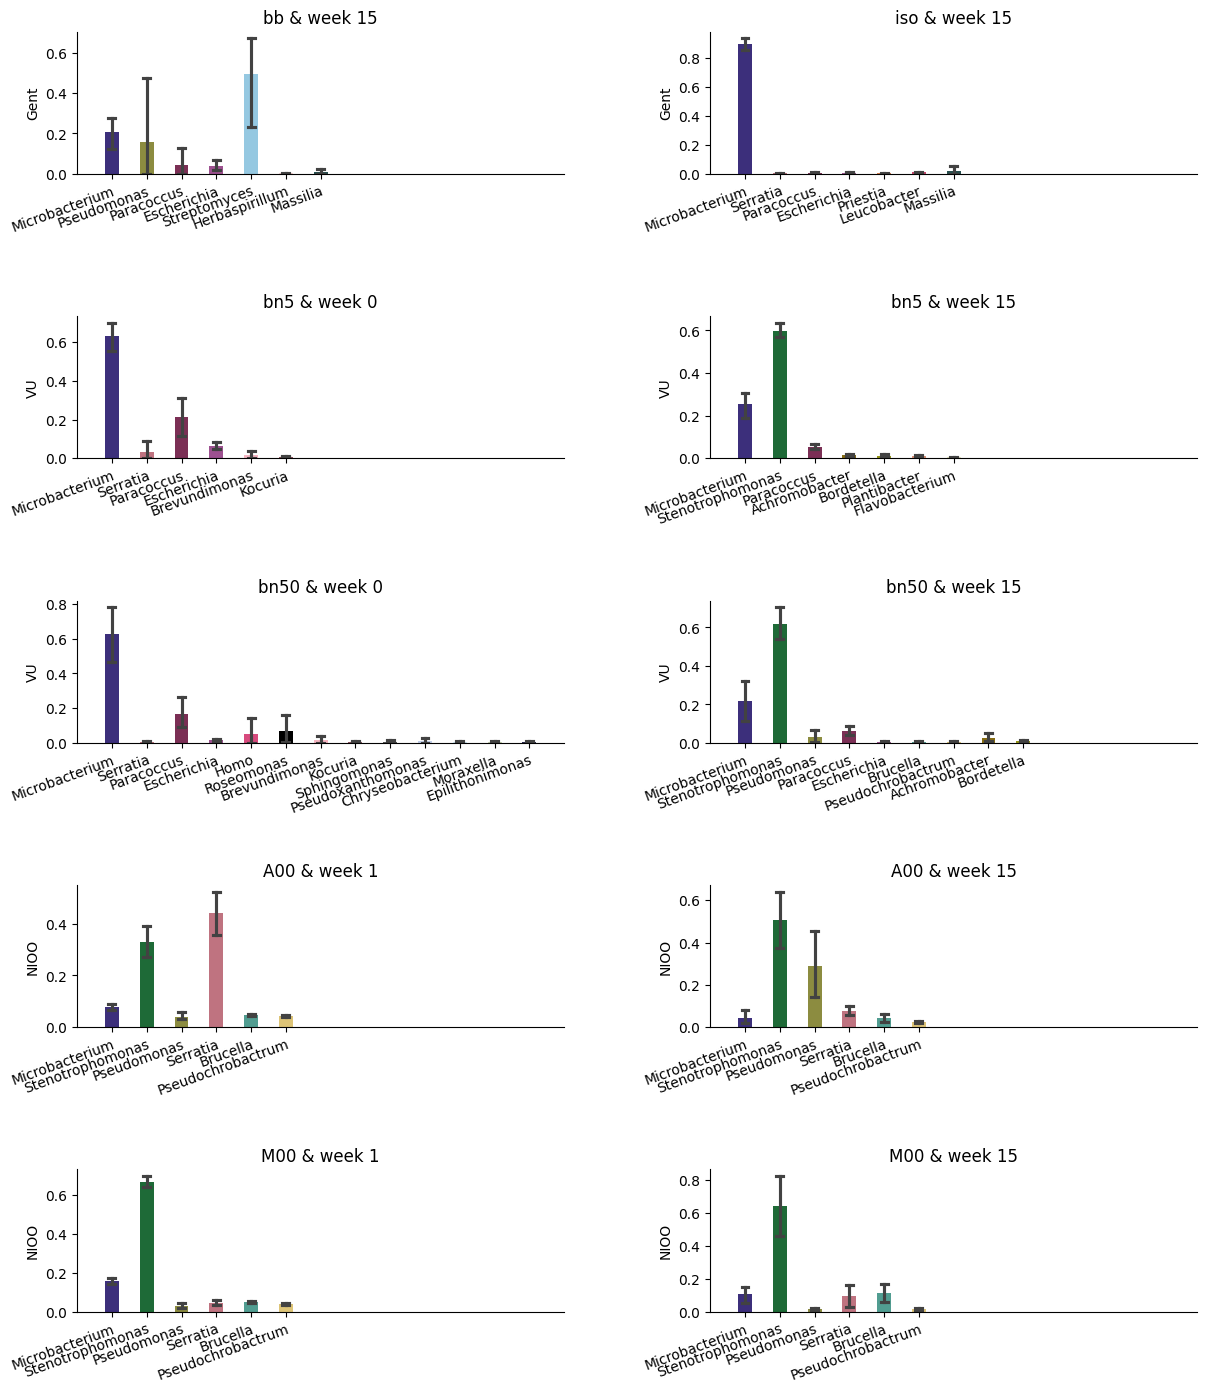

In [14]:
## for kra
df_kra_sort_woName = df_kra_sort.drop(['name_short'],axis=1)

#filter=[('Gent','bb','1'),('Gent','bb','15'),('VU','bb','1'),('VU','bb','15'),('WUR','bb','1'),('WUR','bb','15'),('RUG','bb','1'),('RUG','bb','15'),('NIOO','bb','1'),('NIOO','bb','15'),('UVA','bb','0'),('UVA','anc','0')]
filter=[('Gent','bb','15'),('Gent','iso','15'),('VU','bn5','0'),('VU','bn5','15'),('VU','bn50','0'),('VU','bn50','15'),('NIOO','A00','1'),('NIOO','A00','15'),('NIOO','M00','1'),('NIOO','M00','15')]
#filter=[('UVA','bb'),('UVA','anc')]

# create the figure!
f2, axx = plt.subplots(int(len(filter)/2), 2, figsize=(14, 16))#, sharex=True)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9,  wspace=0.3,hspace=1)

sns.despine()

#for i in range(len(filter)):
for i, ax in enumerate(axx.flat):
    df_here = df_kra_sort_woName.loc[filter[i]]

    # filter such that you keep species where one samples has at least the threshold value!
    keep_columns =df_here.max(axis=0) > threshold
    #print(df_here.min(axis=0))
    keep_column_names = keep_columns[keep_columns].index
    df_hh = df_here[keep_column_names]

    colors_here = finalColors_kra[np.array(keep_columns)]
    # Set your custom color palette
    customPalette = sns.set_palette(sns.color_palette(colors_here))

    
    sns.barplot(data=df_hh, estimator=np.mean, capsize=.2, palette=customPalette, ax=ax , width=0.4)
    title_here=' & week '.join((filter[i][1:3]))
    #if i==0 or i==1:
    ax.set_title(title_here)
    ax.set_xticks(list(range(len(df_hh.columns))))
    ax.set_xticklabels(df_hh.columns, rotation=20, ha='right', rotation_mode='anchor')
    ax.set_ylabel(filter[i][0])
    ax.set_xlim([-1,13])

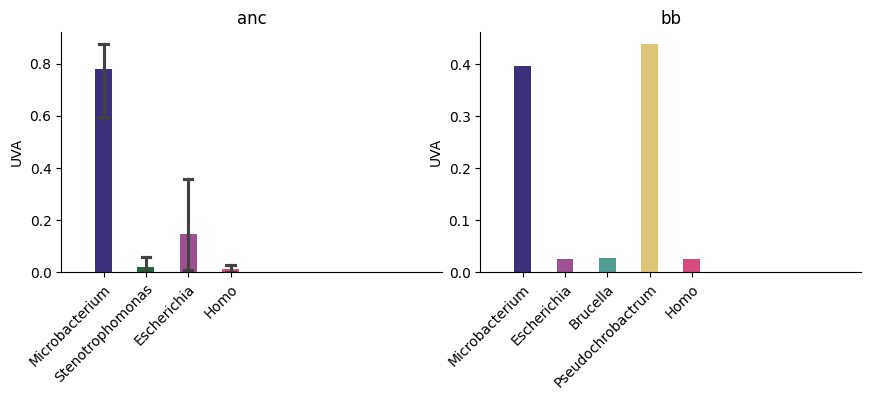

In [11]:
## for motu
df_motu_sort_woName = df_motu_sort.drop(['name_short'],axis=1)
df_kra_sort_woName = df_kra_sort.drop(['name_short'],axis=1)

filter=[('UVA','anc'),('UVA','bb')]
#filter=[('Gent','bb','1'),('Gent','bb','15'),('VU','bb','1'),('VU','bb','15'),('WUR','bb','1'),('WUR','bb','15'),('RUG','bb','1'),('RUG','bb','15'),('NIOO','bb','1'),('NIOO','bb','15'),('UVA','bb','0'),('UVA','anc','0')]

# create the figure!
f2, axx = plt.subplots(int(len(filter)/2), 2, figsize=(10, 3))#, sharex=True)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9,  wspace=0.1,hspace=1)

sns.despine()

#for i in range(len(filter)):
for i, ax in enumerate(axx.flat):
    df_here = df_kra_sort_woName.loc[filter[i]]

    # filter such that you keep species where one samples has at least the threshold value!
    keep_columns =df_here.max(axis=0) > threshold
    #print(df_here.min(axis=0))
    keep_column_names = keep_columns[keep_columns].index
    df_hh = df_here[keep_column_names]

    colors_here = finalColors_kra[np.array(keep_columns)]
    # Set your custom color palette
    customPalette = sns.set_palette(sns.color_palette(colors_here))

    
    sns.barplot(data=df_hh, estimator=np.mean, capsize=.2, palette=customPalette, ax=ax, width=0.4)
    title_here=' & week '.join((filter[i][1:3]))
    if i==0 or i==1:
        ax.set_title(title_here)
    ax.set_xticks(list(range(len(df_hh.columns))))
    ax.set_xticklabels(df_hh.columns, rotation=45, ha='right', rotation_mode='anchor')
    ax.set_ylabel(filter[i][0])
    ax.set_xlim([-1,8])

plt.savefig('/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/2_Metagenomics/1_taxonomy/plots/' + 'BB_RichnessPlot_kraken_042024_0.01minFrac.jpg',
            dpi=200)